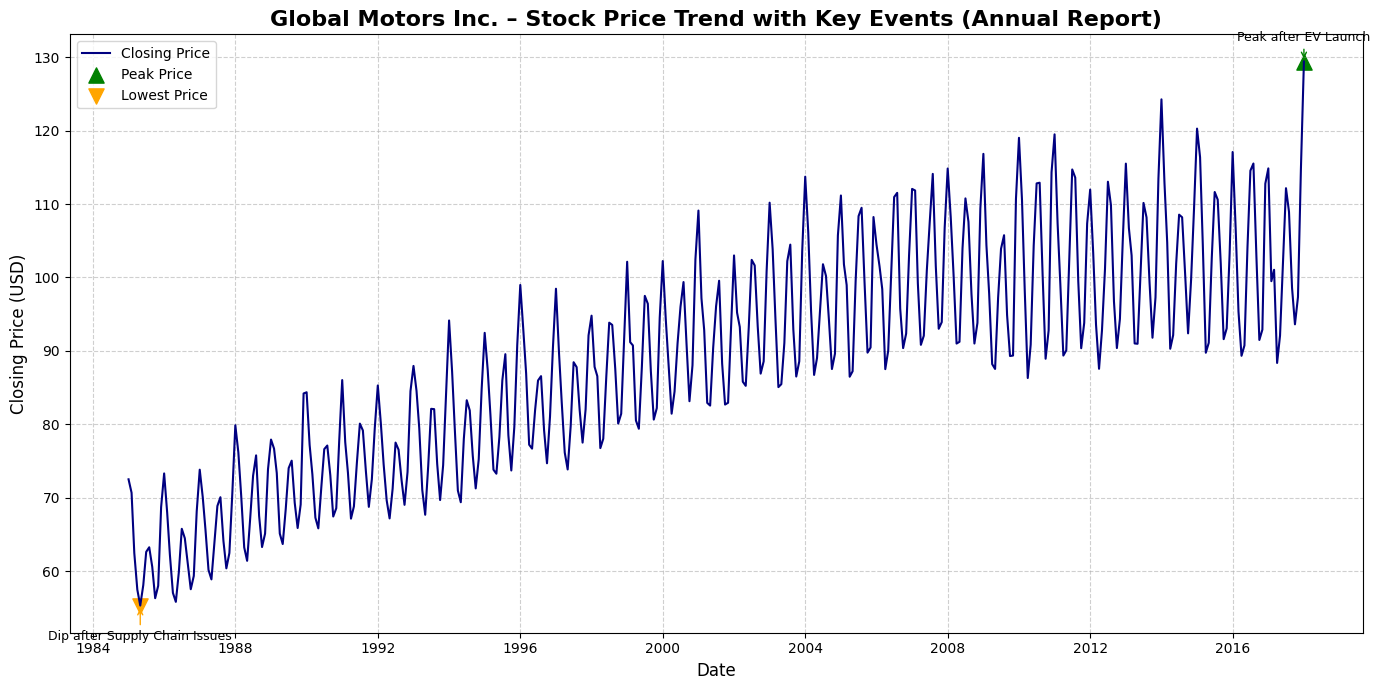

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (Global Motors stock prices - daily closing)
df = pd.read_csv("Electric_Production.csv")  # Replace with actual dataset file path
df['DATE'] = pd.to_datetime(df['DATE'])
df.rename(columns={'IPG2211A2N': 'Close'}, inplace=True)
df = df.sort_values(by='DATE')

# --- Plot Setup ---
plt.figure(figsize=(14,7))
plt.plot(df['DATE'], df['Close'], label='Closing Price', color='navy')

# Grid & labels
plt.grid(True, linestyle='--', alpha=0.6)
plt.title("Global Motors Inc. – Stock Price Trend with Key Events (Annual Report)", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price (USD)", fontsize=12)

# --- Key Events to Annotate ---
events = {
    '2022-01-15': "EV Launch",
    '2022-03-31': "Q1 Earnings",
    '2022-06-30': "Q2 Earnings",
    '2022-08-15': "Merger Announcement",
    '2022-09-30': "Q3 Earnings",
    '2022-10-20': "Supply Chain Disruption",
    '2022-12-31': "Q4 Earnings"
}

# Add Annotations
for date, event in events.items():
    date_obj = pd.to_datetime(date)
    price = df.loc[df['DATE'] == date_obj, 'Close']
    if not price.empty:
        plt.scatter(date_obj, price.values[0], color='red', s=80, zorder=5)
        plt.annotate(event,
                     (date_obj, price.values[0]),
                     textcoords="offset points",
                     xytext=(0,10),
                     ha='center',
                     fontsize=9,
                     bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.5),
                     arrowprops=dict(arrowstyle="->", color='black'))

# --- Highlight peaks & dips ---
peak_date = df.loc[df['Close'].idxmax(), 'DATE']
peak_price = df['Close'].max()
plt.scatter(peak_date, peak_price, color='green', s=120, marker='^', label='Peak Price')
plt.annotate("Peak after EV Launch",
             (peak_date, peak_price),
             textcoords="offset points",
             xytext=(0,15),
             ha='center',
             fontsize=9,
             arrowprops=dict(arrowstyle="->", color='green'))

dip_date = df.loc[df['Close'].idxmin(), 'DATE']
dip_price = df['Close'].min()
plt.scatter(dip_date, dip_price, color='orange', s=120, marker='v', label='Lowest Price')
plt.annotate("Dip after Supply Chain Issues",
             (dip_date, dip_price),
             textcoords="offset points",
             xytext=(0,-25),
             ha='center',
             fontsize=9,
             arrowprops=dict(arrowstyle="->", color='orange'))

# Legend
plt.legend()
plt.tight_layout()
plt.show()
